In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')
structures = pd.read_csv('structures.csv')

In [3]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [4]:
test.head()

,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC
2,4658149,dsgdb9nsd_000004,2,3,3JHH
3,4658150,dsgdb9nsd_000004,3,0,1JHC
4,4658151,dsgdb9nsd_000004,3,1,2JHC


In [5]:
sub.head()

,id,scalar_coupling_constant
0,4658147,0
1,4658148,0
2,4658149,0
3,4658150,0
4,4658151,0


In [6]:
structures.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [7]:
print(f'There are {train.shape[0]} rows in train data.')
print(f"There are {train['molecule_name'].nunique()} distinct molecules in train data.")
print(f"There are {train['type'].nunique()} unique types.")
print(f'There are {test.shape[0]} rows in test data.')
print(f"There are {test['molecule_name'].nunique()} distinct molecules in test data.")
print(f"There are {test['type'].nunique()} unique types.")
print(f'There are {structures.shape[0]} rows in train data.')
print(f"There are {structures['atom'].nunique()} unique atoms.")


There are 4658147 rows in train data.
There are 85003 distinct molecules in train data.
There are 8 unique types.
There are 2505542 rows in test data.
There are 45772 distinct molecules in test data.
There are 8 unique types.
There are 2358657 rows in train data.
There are 5 unique atoms.


In [8]:
magnetic_shield= pd.read_csv('magnetic_shielding_tensors.csv')
magnetic_shield.head()

,molecule_name,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
0,dsgdb9nsd_000001,0,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
1,dsgdb9nsd_000001,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,dsgdb9nsd_000001,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
3,dsgdb9nsd_000001,3,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
4,dsgdb9nsd_000001,4,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013


In [9]:
dipole_moments= pd.read_csv('dipole_moments.csv')
dipole_moments.head()

,molecule_name,X,Y,Z
0,dsgdb9nsd_000001,0.0000,0.0,0.0000
1,dsgdb9nsd_000002,-0.0002,0.0,1.6256
2,dsgdb9nsd_000003,0.0000,0.0,-1.8511
3,dsgdb9nsd_000005,0.0000,0.0,-2.8937
4,dsgdb9nsd_000007,0.0000,0.0,0.0000


In [10]:
potential_energy= pd.read_csv('potential_energy.csv')
potential_energy.head()

,molecule_name,potential_energy
0,dsgdb9nsd_000001,-40.52368
1,dsgdb9nsd_000002,-56.56025
2,dsgdb9nsd_000003,-76.42608
3,dsgdb9nsd_000005,-93.42849
4,dsgdb9nsd_000007,-79.83869


In [11]:
scalar_coupling= pd.read_csv('scalar_coupling_contributions.csv')
scalar_coupling.head()

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870
3,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930
4,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013


In [12]:
mulliken_charges=pd.read_csv('mulliken_charges.csv')
mulliken_charges.head()

,molecule_name,atom_index,mulliken_charge
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922
3,dsgdb9nsd_000001,3,0.133923
4,dsgdb9nsd_000001,4,0.133923


Joining of table from Kaggle


In [2]:
from IPython.display import display

data_path = '../Molecular_Properties'

In [3]:
!ls -lSh $data_path/*.csv

-rwxr-xr-x@ 1 Iftekher  staff   280M May 29 16:33 ../Molecular_Properties/scalar_coupling_contributions.csv
-rwxr-xr-x@ 1 Iftekher  staff   192M May 29 16:33 ../Molecular_Properties/train.csv
-rwxr-xr-x@ 1 Iftekher  staff   135M May 29 16:32 ../Molecular_Properties/structures.csv
-rwxr-xr-x@ 1 Iftekher  staff   130M May 29 16:33 ../Molecular_Properties/magnetic_shielding_tensors.csv
-rwxr-xr-x@ 1 Iftekher  staff    84M May 29 16:33 ../Molecular_Properties/test.csv
-rwxr-xr-x@ 1 Iftekher  staff    42M May 29 16:32 ../Molecular_Properties/mulliken_charges.csv
-rwxr-xr-x@ 1 Iftekher  staff    24M May 29 16:33 ../Molecular_Properties/sample_submission.csv
-rwxr-xr-x@ 1 Iftekher  staff   3.1M May 29 16:34 ../Molecular_Properties/dipole_moments.csv
-rwxr-xr-x@ 1 Iftekher  staff   2.2M May 29 16:33 ../Molecular_Properties/potential_energy.csv


In [4]:
files_names = !ls $data_path/*.csv
files_names

['../Molecular_Properties/dipole_moments.csv',
 '../Molecular_Properties/magnetic_shielding_tensors.csv',
 '../Molecular_Properties/mulliken_charges.csv',
 '../Molecular_Properties/potential_energy.csv',
 '../Molecular_Properties/sample_submission.csv',
 '../Molecular_Properties/scalar_coupling_contributions.csv',
 '../Molecular_Properties/structures.csv',
 '../Molecular_Properties/test.csv',
 '../Molecular_Properties/train.csv']

In [5]:
data_dict = {}

for name in files_names:
    data_dict[name.split('/')[-1][:-4]] = pd.read_csv(name)

In [17]:
for k in data_dict.keys():
    display(k)
    display(data_dict[k].head())

'dipole_moments'

,molecule_name,X,Y,Z
0,dsgdb9nsd_000001,0.0000,0.0,0.0000
1,dsgdb9nsd_000002,-0.0002,0.0,1.6256
2,dsgdb9nsd_000003,0.0000,0.0,-1.8511
3,dsgdb9nsd_000005,0.0000,0.0,-2.8937
4,dsgdb9nsd_000007,0.0000,0.0,0.0000


'magnetic_shielding_tensors'

,molecule_name,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
0,dsgdb9nsd_000001,0,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
1,dsgdb9nsd_000001,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,dsgdb9nsd_000001,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
3,dsgdb9nsd_000001,3,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
4,dsgdb9nsd_000001,4,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013


'mulliken_charges'

,molecule_name,atom_index,mulliken_charge
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922
3,dsgdb9nsd_000001,3,0.133923
4,dsgdb9nsd_000001,4,0.133923


'potential_energy'

,molecule_name,potential_energy
0,dsgdb9nsd_000001,-40.52368
1,dsgdb9nsd_000002,-56.56025
2,dsgdb9nsd_000003,-76.42608
3,dsgdb9nsd_000005,-93.42849
4,dsgdb9nsd_000007,-79.83869


'sample_submission'

,id,scalar_coupling_constant
0,4658147,0
1,4658148,0
2,4658149,0
3,4658150,0
4,4658151,0


'scalar_coupling_contributions'

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870
3,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930
4,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013


'structures'

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


'test'

,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC
2,4658149,dsgdb9nsd_000004,2,3,3JHH
3,4658150,dsgdb9nsd_000004,3,0,1JHC
4,4658151,dsgdb9nsd_000004,3,1,2JHC


'train'

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [6]:
df_complete = data_dict['train'].copy()
df_complete = df_complete.join(data_dict['potential_energy'].set_index('molecule_name'), on='molecule_name')
df_complete = df_complete.join(data_dict['dipole_moments'].set_index('molecule_name'), on='molecule_name', lsuffix='dipole_moments_')
df_complete = df_complete.join(data_dict['magnetic_shielding_tensors'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_0'], lsuffix='_atom0')
df_complete = df_complete.join(data_dict['magnetic_shielding_tensors'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_1'], lsuffix='_atom1')
df_complete = df_complete.join(data_dict['mulliken_charges'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_0'], lsuffix='_atom0')
df_complete = df_complete.join(data_dict['mulliken_charges'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_1'], lsuffix='_atom1')
df_complete = df_complete.join(data_dict['scalar_coupling_contributions'].set_index(['molecule_name', 'atom_index_0', 'atom_index_1']), on=['molecule_name', 'atom_index_0', 'atom_index_1'], rsuffix='_scc')
df_complete = df_complete.join(data_dict['structures'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_0'], lsuffix='_atom0_structure')
df_complete = df_complete.join(data_dict['structures'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_1'], lsuffix='_atom1_structure')

back to me

In [9]:
df= df_complete
df.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,potential_energy,X,Y,Z,...,pso,dso,atom_atom1_structure,x_atom1_structure,y_atom1_structure,z_atom1_structure,atom,x,y,z
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,-40.52368,0.0,0.0,0.0,...,1.25862,0.272010,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,-40.52368,0.0,0.0,0.0,...,2.85839,-3.433600,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,-40.52368,0.0,0.0,0.0,...,2.85852,-3.433870,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,-40.52368,0.0,0.0,0.0,...,2.85855,-3.433930,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,-40.52368,0.0,0.0,0.0,...,1.25861,0.272013,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001


In [10]:
df.describe()

,id,atom_index_0,atom_index_1,scalar_coupling_constant,potential_energy,X,Y,Z,XX_atom1,YX_atom1,...,fc,sd,pso,dso,x_atom1_structure,y_atom1_structure,z_atom1_structure,x,y,z
count,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,...,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06
mean,2.329073e+06,1.335689e+01,5.883966e+00,1.592165e+01,-4.042052e+02,-1.881619e-02,8.021838e-02,2.280645e-01,2.962281e+01,1.583923e-02,...,1.569776e+01,8.233637e-02,3.751619e-01,-2.336117e-01,1.058781e-01,-2.203691e-01,4.712888e-02,9.757184e-02,-3.956294e-01,7.768257e-02
std,1.344691e+06,3.267712e+00,4.993943e+00,3.494198e+01,3.715726e+01,2.123380e+00,1.613989e+00,1.015052e+00,3.033050e+00,2.445935e+00,...,3.441461e+01,1.386516e-01,7.422133e-01,9.296036e-01,1.759873e+00,2.121789e+00,1.564513e+00,1.479416e+00,1.767196e+00,1.255910e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-3.621860e+01,-7.146262e+02,-2.295800e+01,-9.252300e+00,-6.028500e+00,9.777800e+00,-1.519820e+01,...,-3.722400e+01,-3.184910e+00,-3.288110e+00,-6.856790e+00,-9.234889e+00,-9.494160e+00,-9.134765e+00,-9.234889e+00,-9.254405e+00,-8.789131e+00
25%,1.164536e+06,1.100000e+01,2.000000e+00,-2.549780e-01,-4.244322e+02,-1.182200e+00,-8.477000e-01,-3.028000e-01,2.761585e+01,-1.404600e+00,...,-2.129645e-01,-1.438100e-02,-3.506500e-02,-3.734250e-01,-9.530924e-01,-1.836966e+00,-9.642128e-01,-7.927602e-01,-1.607567e+00,-6.696343e-01
50%,2.329073e+06,1.300000e+01,5.000000e+00,2.281130e+00,-4.032927e+02,-1.000000e-04,6.320000e-02,1.219000e-01,2.925070e+01,2.400000e-03,...,2.327140e+00,5.072900e-02,1.594810e-01,-6.476600e-02,1.341212e-01,-2.979936e-01,4.972893e-03,4.660419e-02,-5.081915e-01,1.549763e-02
75%,3.493610e+06,1.600000e+01,8.000000e+00,7.390655e+00,-3.859742e+02,1.136900e+00,1.067400e+00,8.839000e-01,3.121620e+01,1.439100e+00,...,7.472885e+00,1.303520e-01,4.350445e-01,1.433210e-01,1.227746e+00,1.753418e+00,1.035102e+00,9.682240e-01,2.882334e-01,8.926133e-01
max,4.658146e+06,2.800000e+01,2.800000e+01,2.048800e+02,-4.052368e+01,2.187380e+01,1.300560e+01,6.880100e+00,4.794440e+01,1.583020e+01,...,2.055170e+02,2.296690e+00,8.201530e+00,1.701610e+00,9.382240e+00,9.714469e+00,7.637578e+00,8.420893e+00,8.653665e+00,7.460225e+00


In [11]:
df.isnull().sum()

id                          0
molecule_name               0
atom_index_0                0
atom_index_1                0
type                        0
scalar_coupling_constant    0
potential_energy            0
X                           0
Y                           0
Z                           0
XX_atom1                    0
YX_atom1                    0
ZX_atom1                    0
XY_atom1                    0
YY_atom1                    0
ZY_atom1                    0
XZ_atom1                    0
YZ_atom1                    0
ZZ_atom1                    0
XX                          0
YX                          0
ZX                          0
XY                          0
YY                          0
ZY                          0
XZ                          0
YZ                          0
ZZ                          0
mulliken_charge_atom1       0
mulliken_charge             0
type_scc                    0
fc                          0
sd                          0
pso       

In [12]:
df.nunique().sum()

24178350

In [13]:
param_def={'num_leaves': 150,
          'min_data_in_leaf': 75,
          'objective': 'binary',
          'max_depth': 9,
          'learning_rate': 0.03,
          "boosting": "gbdt",
          "bagging_freq": 1,
          "bagging_fraction": 0.8,
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.1,
          'reg_lambda': 0.3,
          'feature_fraction': 1.0
         }

In [15]:
features= df.drop(['scalar_coupling_constant'], axis=1)
features

,id,molecule_name,atom_index_0,atom_index_1,type,potential_energy,X,Y,Z,XX_atom1,...,pso,dso,atom_atom1_structure,x_atom1_structure,y_atom1_structure,z_atom1_structure,atom,x,y,z
0,0,dsgdb9nsd_000001,1,0,1JHC,-40.52368,0.0000,0.0000,0.0000,31.3410,...,1.258620,0.272010,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,1,2,2JHH,-40.52368,0.0000,0.0000,0.0000,31.3410,...,2.858390,-3.433600,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,1,3,2JHH,-40.52368,0.0000,0.0000,0.0000,31.3410,...,2.858520,-3.433870,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644
3,3,dsgdb9nsd_000001,1,4,2JHH,-40.52368,0.0000,0.0000,0.0000,31.3410,...,2.858550,-3.433930,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397
4,4,dsgdb9nsd_000001,2,0,1JHC,-40.52368,0.0000,0.0000,0.0000,31.5814,...,1.258610,0.272013,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001
5,5,dsgdb9nsd_000001,2,3,2JHH,-40.52368,0.0000,0.0000,0.0000,31.5814,...,2.858560,-3.433950,H,1.011731,1.463751,0.000277,H,-0.540815,1.447527,-0.876644
6,6,dsgdb9nsd_000001,2,4,2JHH,-40.52368,0.0000,0.0000,0.0000,31.5814,...,2.858530,-3.433870,H,1.011731,1.463751,0.000277,H,-0.523814,1.437933,0.906397
7,7,dsgdb9nsd_000001,3,0,1JHC,-40.52368,0.0000,0.0000,0.0000,31.5172,...,1.258560,0.272012,H,-0.540815,1.447527,-0.876644,C,-0.012698,1.085804,0.008001
8,8,dsgdb9nsd_000001,3,4,2JHH,-40.52368,0.0000,0.0000,0.0000,31.5172,...,2.858560,-3.433930,H,-0.540815,1.447527,-0.876644,H,-0.523814,1.437933,0.906397
9,9,dsgdb9nsd_000001,4,0,1JHC,-40.52368,0.0000,0.0000,0.0000,31.4029,...,1.258560,0.272012,H,-0.523814,1.437933,0.906397,C,-0.012698,1.085804,0.008001


In [16]:
target= df[['scalar_coupling_constant']]
target

,scalar_coupling_constant
0,84.807600
1,-11.257000
2,-11.254800
3,-11.254300
4,84.807400
5,-11.254100
6,-11.254800
7,84.809300
8,-11.254300
9,84.809500


In [17]:
feature_train, feature_test, target_train, target_test= train_test_split(features, target, test_size=0.2)

In [18]:
print('total feature training features: ', len(feature_train))
print('total feature testing features: ', len(feature_test))
print('total target training features: ', len(target_train))
print('total target testing features: ', len(target_test))

total feature training features:  3726517
total feature testing features:  931630
total target training features:  3726517
total target testing features:  931630


In [19]:
feature_train.shape

(3726517, 42)

In [20]:
target_train.shape

(3726517, 1)

In [22]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=42, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                516       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 629
Trainable params: 629
Non-trainable params: 0
_________________________________________________________________


In [31]:
feature_train

,id,molecule_name,atom_index_0,atom_index_1,type,potential_energy,X,Y,Z,XX_atom1,...,pso,dso,atom_atom1_structure,x_atom1_structure,y_atom1_structure,z_atom1_structure,atom,x,y,z
899347,899347,dsgdb9nsd_031618,9,2,3JHC,-435.4465,-2.6175,0.7541,0.2654,28.7814,...,-0.195056,0.174239,H,0.712743,0.059987,-1.254021,C,0.397362,-0.593013,1.386179
106879,106879,dsgdb9nsd_004099,15,3,2JHC,-363.9906,-0.8055,0.5041,-0.0002,28.2874,...,0.123375,-0.115019,H,0.949540,-2.736553,1.190524,C,0.008369,-2.218306,-0.737208
627910,627910,dsgdb9nsd_019809,13,7,1JHC,-382.5958,-2.5115,1.8504,2.1290,27.1957,...,0.270998,1.104630,H,1.822347,2.214147,-0.845138,C,1.091048,2.286916,-0.040538
1852942,1852942,dsgdb9nsd_059459,22,5,3JHC,-425.6209,0.3989,0.6097,-1.5475,25.3824,...,-0.229308,0.414335,H,-0.347324,-3.113082,-2.095578,C,-1.338386,-2.306132,-0.110929
823211,823211,dsgdb9nsd_028314,14,4,1JHC,-382.2309,-1.1633,0.2832,-0.6248,28.6326,...,0.080937,0.881334,H,1.740217,-3.307323,-1.434624,C,0.736120,-3.346448,-1.001633
1863007,1863007,dsgdb9nsd_059660,15,18,3JHH,-425.6272,2.2788,0.9502,0.7584,27.6870,...,1.161570,-1.572400,H,-2.899093,0.251812,-1.513525,H,-2.765016,-2.700750,-1.775933
839030,839030,dsgdb9nsd_029064,13,3,3JHC,-420.7892,3.2871,-3.4335,0.0026,26.0955,...,0.295416,-0.460011,H,-1.098138,-4.059828,-0.014117,C,1.597325,-1.981393,-0.016846
741842,741842,dsgdb9nsd_024354,15,7,2JHC,-438.0318,0.7392,-0.0001,0.0007,26.7450,...,-0.736827,-0.273341,H,0.363104,-2.680974,1.175157,C,0.872997,-0.524884,0.878705
1206696,1206696,dsgdb9nsd_039966,20,1,3JHC,-350.1091,-0.3040,-0.0957,0.1325,28.8201,...,-0.031027,0.034908,H,0.222123,-1.575806,-1.490320,C,1.354489,0.735068,0.087182
1704723,1704723,dsgdb9nsd_055472,12,6,2JHC,-476.4048,-3.3265,2.6007,-0.7603,28.9937,...,-0.003146,-0.028254,H,-3.831122,-1.064007,0.469113,C,-3.399834,-1.966458,-1.459316


In [34]:
feature_train.describe()

,id,atom_index_0,atom_index_1,potential_energy,X,Y,Z,XX_atom1,YX_atom1,ZX_atom1,...,fc,sd,pso,dso,x_atom1_structure,y_atom1_structure,z_atom1_structure,x,y,z
count,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,...,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06,3.726517e+06
mean,2.329208e+06,1.335647e+01,5.884973e+00,-4.042041e+02,-1.898719e-02,8.029009e-02,2.282131e-01,2.962211e+01,1.594506e-02,1.189891e-02,...,1.570145e+01,8.230394e-02,3.748135e-01,-2.333438e-01,1.055181e-01,-2.198898e-01,4.690986e-02,9.708531e-02,-3.957046e-01,7.747917e-02
std,1.344878e+06,3.266758e+00,4.994092e+00,3.715465e+01,2.123245e+00,1.614205e+00,1.014996e+00,3.032868e+00,2.445895e+00,2.484893e+00,...,3.441918e+01,1.386150e-01,7.416906e-01,9.292773e-01,1.760320e+00,2.121736e+00,1.564855e+00,1.479847e+00,1.767347e+00,1.255901e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-7.146262e+02,-2.295800e+01,-9.252300e+00,-6.028500e+00,9.777800e+00,-1.519820e+01,-1.569610e+01,...,-3.722400e+01,-3.184910e+00,-3.288110e+00,-6.856790e+00,-9.234889e+00,-9.494160e+00,-9.134765e+00,-9.234889e+00,-9.254405e+00,-8.789131e+00
25%,1.164189e+06,1.100000e+01,2.000000e+00,-4.244319e+02,-1.182200e+00,-8.472000e-01,-3.022000e-01,2.761480e+01,-1.404100e+00,-1.356800e+00,...,-2.122790e-01,-1.441200e-02,-3.516000e-02,-3.733960e-01,-9.534203e-01,-1.834992e+00,-9.647232e-01,-7.938268e-01,-1.607134e+00,-6.697502e-01
50%,2.329255e+06,1.300000e+01,5.000000e+00,-4.032925e+02,-1.000000e-04,6.320000e-02,1.220000e-01,2.924970e+01,2.300000e-03,0.000000e+00,...,2.329220e+00,5.070600e-02,1.594670e-01,-6.474400e-02,1.340970e-01,-2.975951e-01,4.974496e-03,4.653989e-02,-5.080047e-01,1.548395e-02
75%,3.494360e+06,1.600000e+01,8.000000e+00,-3.859737e+02,1.136900e+00,1.067200e+00,8.844000e-01,3.121580e+01,1.438400e+00,1.370200e+00,...,7.473170e+00,1.303690e-01,4.346460e-01,1.434300e-01,1.227898e+00,1.753394e+00,1.035054e+00,9.682654e-01,2.882007e-01,8.925049e-01
max,4.658146e+06,2.800000e+01,2.800000e+01,-4.052368e+01,2.187380e+01,1.300560e+01,6.880100e+00,4.794440e+01,1.583020e+01,1.560420e+01,...,2.055170e+02,2.296690e+00,8.201530e+00,1.701610e+00,9.382240e+00,9.714469e+00,7.637578e+00,8.420893e+00,8.653665e+00,7.460225e+00


In [26]:
feature_array= feature_train.to_numpy()

In [27]:
feature_array

array([[899347, 'dsgdb9nsd_031618', 9, ..., 0.3973624542, -0.5930134573,
        1.386178819],
       [106879, 'dsgdb9nsd_004099', 15, ..., 0.0083690513, -2.218306107,
        -0.7372075718000001],
       [627910, 'dsgdb9nsd_019809', 13, ..., 1.091047521, 2.286915932,
        -0.040537924700000005],
       ...,
       [1928959, 'dsgdb9nsd_061302', 21, ..., 0.22207635190000002,
        -0.021795805, 2.612590805],
       [1044613, 'dsgdb9nsd_036180', 10, ..., -1.63833e-05, -1.17450108,
        -0.0416097903],
       [3729022, 'dsgdb9nsd_106548', 15, ..., 1.108776831,
        -0.5137005232999999, 1.1404129729999999]], dtype=object)

In [28]:
target_array= target_train.to_numpy()

In [29]:
target_array

array([[ 1.14346 ],
       [-0.796105],
       [87.4275  ],
       ...,
       [ 0.125921],
       [ 0.879361],
       [-0.356447]])

In [30]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(feature_array, target_array, validation_split=0.30, epochs=150, batch_size=10)

Train on 2608561 samples, validate on 1117956 samples
Epoch 1/150


ValueError: could not convert string to float: 'dsgdb9nsd_100757'

## New Start with proper dataset

In [16]:
df= pd.read_csv("NoCatDataSet.csv")
df
len(df)

4658147

In [17]:
param_def={'num_leaves': 150,
          'min_data_in_leaf': 75,
          'objective': 'binary',
          'max_depth': 9,
          'learning_rate': 0.03,
          "boosting": "gbdt",
          "bagging_freq": 1,
          "bagging_fraction": 0.8,
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.1,
          'reg_lambda': 0.3,
          'feature_fraction': 1.0
         }

In [18]:
features= df.drop(['scalar_coupling_constant'], axis=1)
target= df[['scalar_coupling_constant']]

feature_train, feature_test, target_train, target_test= train_test_split(features, target, test_size=0.1)

print('total feature training features: ', len(feature_train))
print('total feature testing features: ', len(feature_test))
print('total target training features: ', len(target_train))
print('total target testing features: ', len(target_test))

total feature training features:  4192332
total feature testing features:  465815
total target training features:  4192332
total target testing features:  465815


In [19]:
feature_train.shape

(4192332, 36)

In [20]:
target_train.shape

(4192332, 1)

In [21]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=36, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                444       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 557
Trainable params: 557
Non-trainable params: 0
_________________________________________________________________


In [22]:
feature_array= feature_train.to_numpy()
target_array= target_train.to_numpy()

In [34]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history= model.fit(feature_array, target_array, validation_split=0.15, epochs=100, batch_size=50)

Train on 3563482 samples, validate on 628850 samples
Epoch 1/100
3563482/3563482 [==============================] - 77s 22us/step - loss: -411452429025460224.0000 - accuracy: 5.6125e-07 - val_loss: -416076565598176768.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
3563482/3563482 [==============================] - 77s 22us/step - loss: -420671198608514624.0000 - accuracy: 5.6125e-07 - val_loss: -425365383016754624.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
3563482/3563482 [==============================] - 78s 22us/step - loss: -430028277255104576.0000 - accuracy: 5.6125e-07 - val_loss: -434791407293441344.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
3563482/3563482 [==============================] - 81s 23us/step - loss: -439520941062581120.0000 - accuracy: 5.6125e-07 - val_loss: -444355692356122048.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
3563482/3563482 [==============================] - 81s 23us/step - loss: -449157591424511360.0000 - accuracy: 5.6125e-07 - val_loss: -4540591937867

3563482/3563482 [==============================] - 77s 22us/step - loss: -896834087867427072.0000 - accuracy: 5.6125e-07 - val_loss: -904620721795666688.0000 - val_accuracy: 0.0000e+00
Epoch 42/100
3563482/3563482 [==============================] - 78s 22us/step - loss: -912305867587668608.0000 - accuracy: 5.6125e-07 - val_loss: -920184503277176960.0000 - val_accuracy: 0.0000e+00
Epoch 43/100
3563482/3563482 [==============================] - 77s 22us/step - loss: -927953467458184320.0000 - accuracy: 5.6125e-07 - val_loss: -935925790555931264.0000 - val_accuracy: 0.0000e+00
Epoch 44/100
3563482/3563482 [==============================] - 81s 23us/step - loss: -943778945167840256.0000 - accuracy: 5.6125e-07 - val_loss: -951845628878295808.0000 - val_accuracy: 0.0000e+00
Epoch 45/100
3563482/3563482 [==============================] - 85s 24us/step - loss: -959793252972263808.0000 - accuracy: 5.6125e-07 - val_loss: -967944925471186560.0000 - val_accuracy: 0.0000e+00
Epoch 46/100
3563482/35

3563482/3563482 [==============================] - 77s 22us/step - loss: -1617757765705579008.0000 - accuracy: 5.6125e-07 - val_loss: -1629324017385131776.0000 - val_accuracy: 0.0000e+0094824 - ETA: 2s - loss: -1618031755391455488.0000 - accuracy: 5 - ETA: 2s - loss: -1617785
Epoch 80/100
3563482/3563482 [==============================] - 77s 21us/step - loss: -1640661110362611200.0000 - accuracy: 5.6125e-07 - val_loss: -1652340755752663040.0000 - val_accuracy: 0.0000e+00
Epoch 81/100
3563482/3563482 [==============================] - 77s 22us/step - loss: -1663800411444233216.0000 - accuracy: 5.6125e-07 - val_loss: -1675573282598388992.0000 - val_accuracy: 0.0000e+00
Epoch 82/100
3563482/3563482 [==============================] - 77s 22us/step - loss: -1687127412388100096.0000 - accuracy: 5.6125e-07 - val_loss: -1699022469159515904.0000 - val_accuracy: 0.0000e+00
Epoch 83/100
3563482/3563482 [==============================] - 79s 22us/step - loss: -1710682720192536832.0000 - accuracy:

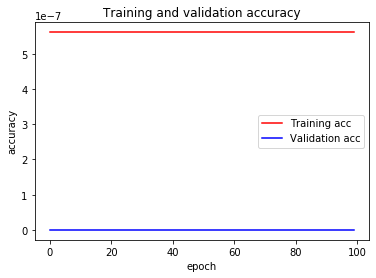

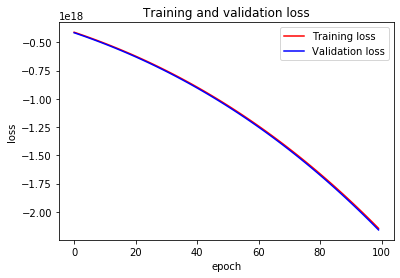

In [37]:
#Graphing our training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()